# CIFAR-10 CLASSIFICATION WITH CNN

In this notebook we will build a convolutional artificial neural network to classify image examples from the CIFAR-10 dataset.

### First step is to import the necessary libraries

In [16]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from keras.backend import set_session

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)

### Next we will define the hyper parameters of the model

In [2]:
batch_size = 64
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
learning_rate = 0.0001
decay = 1e-6
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

### Download and load the data

Using the keras' load_data function from the keras datasets, we download and load the CIFAR-10 dataset.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Prepare the data

We convert the class labels to one-hot encoded categorical vectors. Then we normalize the input data

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Define and compile the model

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=learning_rate, decay=decay)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

### Define data generator

Keras' data generator allows us to define augmentation parameters. It is also useful when the data is too large and need to be loaded on the memory during the training as batches.

In [22]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None)

datagen.fit(x_train)

### Train the model

In [23]:
history = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/20
782/782 [==============================] - 10s 12ms/step - loss: 1.8820 - acc: 0.2991 - val_loss: 1.5708 - val_acc: 0.4367
Epoch 2/20
782/782 [==============================] - 9s 11ms/step - loss: 1.5976 - acc: 0.4140 - val_loss: 1.4103 - val_acc: 0.4895
Epoch 3/20
782/782 [==============================] - 10s 12ms/step - loss: 1.4766 - acc: 0.4629 - val_loss: 1.3148 - val_acc: 0.5352
Epoch 4/20
782/782 [==============================] - 9s 12ms/step - loss: 1.3914 - acc: 0.5005 - val_loss: 1.2394 - val_acc: 0.5628
Epoch 5/20
782/782 [==============================] - 9s 12ms/step - loss: 1.3412 - acc: 0.5165 - val_loss: 1.1937 - val_acc: 0.5783
Epoch 6/20
782/782 [==============================] - 9s 11ms/step - loss: 1.2883 - acc: 0.5380 - val_loss: 1.1198 - val_acc: 0.6090
Epoch 7/20
782/782 [==============================] - 9s 11ms/step - loss: 1.2445 - acc: 0.5573 - val_loss: 1.0757 - val_acc: 0.6238
Epoch 8/20
782/782 [==============================] - 9s 11ms/step 

### Visualize the metrics

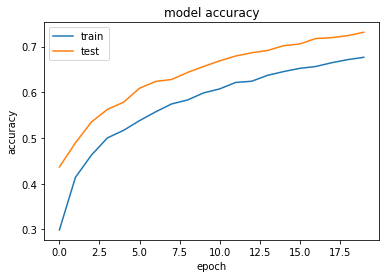

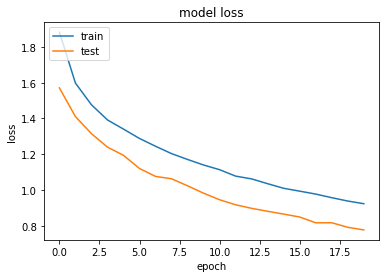

In [24]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test on a sample data

0

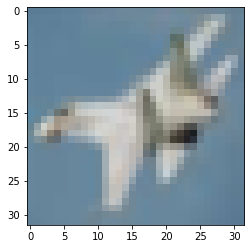

In [26]:
labels = {'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}
img = x_test[10]
plt.imshow(img)
pred = model.predict(np.expand_dims(img, 0))
labels[np.argmax(pred)]